# Simple Background Estimation

En este laboratorio, nuestro objetivo será aplicar técnicas de edición de imágenes: Estimación simple de fondo.

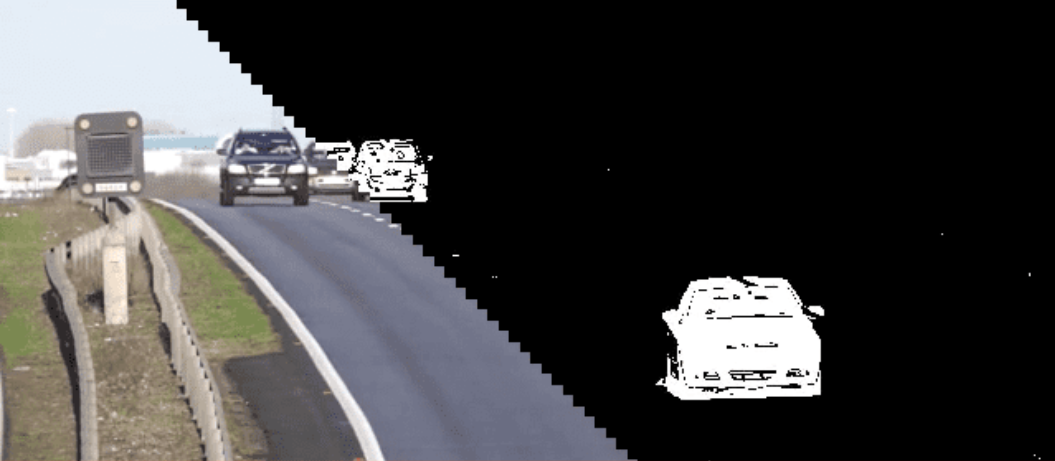

# Contextualizacion

 Consideremos un problema más simple en 1D. Supongamos que estamos estimando una cantidad (digamos la temperatura de la habitación) cada 10 milisegundos. Digamos, que la temperatura de la habitación es de 70 grados Fahrenheit. (Si, lo robé de una pagina)



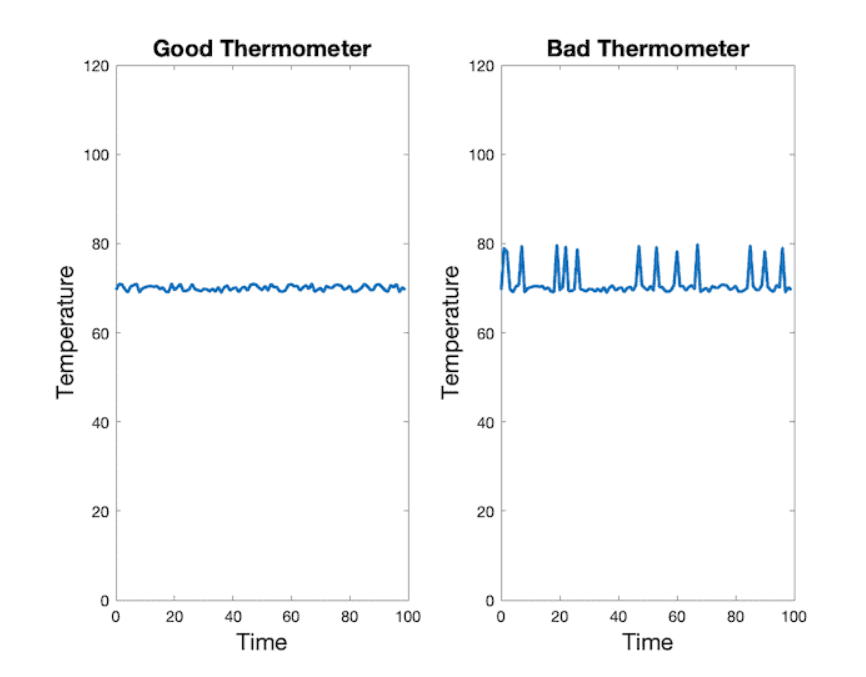

En la figura anterior, hemos mostrado las mediciones de dos termómetros: uno bueno y otro malo.

El termómetro bueno de la izquierda indica 70 grados con cierto nivel de ruido gaussiano. Para obtener una estimación más precisa de la temperatura, podemos simplemente promediar los valores durante unos segundos. Como el ruido es gaussiano con valores positivos y negativos, la media anulará el ruido. De hecho, el valor medio en este caso concreto es 70,01.

El termómetro malo, en cambio, se comporta como el bueno la mayor parte del tiempo, pero de vez en cuando las cifras son completamente erróneas.

De hecho, si hacemos una media de las cifras indicadas por el termómetro malo, obtenemos 71,07 grados. Se trata claramente de una sobreestimación.

**¿Todavía podemos obtener una buena estimación de la temperatura?**

La respuesta es SÍ. Cuando los datos contienen valores atípicos, la mediana es una estimación más sólida del valor que intentamos estimar.

La mediana es el valor medio de los datos cuando se ordenan de forma ascendente o descendente.

La mediana de la curva anterior es 70,05 grados, una estimación mucho mejor que 71,07 grados.

El único inconveniente es que la mediana es más cara de calcular que la media.

# Utilización de la mediana para la estimación del fondo

Volvamos ahora al problema de la estimación del fondo cuando la cámara está estática.

Podemos suponer que la mayor parte del tiempo, cada píxel ve el mismo trozo del fondo porque la cámara no se mueve. Ocasionalmente, un coche u otro objeto en movimiento aparece por delante y oscurece el fondo.

Para una secuencia de vídeo, podemos muestrear aleatoriamente unos cuantos fotogramas (digamos 25 fotogramas).

En otras palabras, por cada píxel tenemos 25 estimaciones del fondo. Mientras un píxel no esté cubierto por un coche u otro objeto en movimiento más del 50% del tiempo, la mediana del píxel en esos 25 fotogramas dará una buena estimación del fondo en ese píxel.

Podemos repetir esta operación para cada píxel y recuperar todo el fondo.

In [8]:
import numpy as np
import cv2
from skimage import data, filters
from google.colab.patches import cv2_imshow

# Cargamos el video, como aprendimos en labs anteriores

cap = cv2.VideoCapture('video.mp4')

# vean el video desde archivos noma

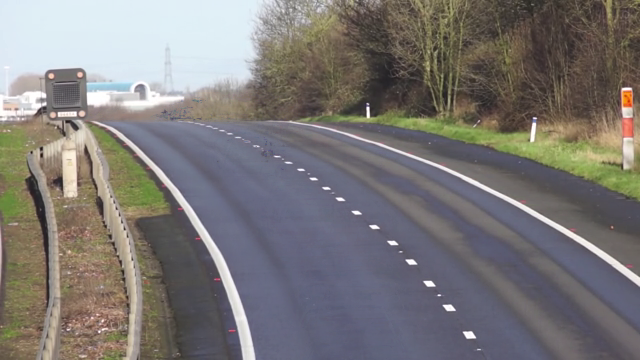

In [9]:
# Seleccionamos al azar 25 frames del video por sus ID

frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=25)

# Guardamos los frames en un array para utilizarlos despues
frames = []

for fid in frameIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = cap.read()
    frames.append(frame)

# Calcular la mediana a lo largo de todos los frames
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)

# Ahora tenemos esto
cv2_imshow(medianFrame)

Como puede ver, seleccionamos aleatoriamente 25 fotogramas y calculamos la mediana de cada píxel en los 25 fotogramas.

Esta mediana de fotogramas es una buena estimación del fondo siempre que cada píxel vea el fondo al menos el 50% de las veces.

# Diferenciación de fotogramas

La siguiente pregunta obvia es si podemos crear una máscara para cada fotograma que muestre las partes de la imagen que están en movimiento.

Y si, si se puede.

Para hacerlo, debemos cumplir los siguientes pasos:

1. Convierte el medianFrame a escala de grises.

In [16]:
# Reseteamos el numero de frame a 0
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Aplicamos la escala de grises
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)

2. Recorre en bucle todos los fotogramas del vídeo, extrayendo el fotograma actual y convirtiendolo a escala de grises.

3. Calcular la diferencia absoluta entre el fotograma actual y el fotograma medio.

4. Aplica Thresholding para eliminar el ruido y binarizar la salida.

In [ ]:
ret = True

while(ret):

  # Leer el frame
  ret, frame = cap.read()

  # Check if frame is successfully read
  if not ret:
    print("Error: No se pudo leer el frame. Posiblemente fin del video.")
    break  # Exit the loop if frame is None

  # Convertirlo a escala de grises
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # Calcular la diferencia absoluta entre actual y mediana
  dframe = cv2.absdiff(frame, grayMedianFrame)
  # Aplicar thresholding
  th, dframe = cv2.threshold(dframe, 30, 255, cv2.THRESH_BINARY)

  # no se los recomiendo
  # cv2_imshow(dframe)

Como Collab no nos deja ver videitos, [acá](https://www.youtube.com/watch?v=UTd40wOXUmY&t=21s) les dejo el link para ver el video, pero subido en youtube.